# 04-circle-estimation-gradient

> Start point : [docs.pytorch.org - beginner - Learning PyTorch with Examples](https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html)) dealing with polynomial estimation of sin(x)

Estimate circle parameters using gradient descent with symbolic differentiation (before testing autograd from pytorch).


t=0: cx=0.49772844801348237, cy=-0.23381199566970473, r=0.449972432823145, loss=205870.45596149756
t=1000: cx=1.8450773261069517, cy=2.6029954326436475, r=1.3244926351238193, loss=55901.51874582421
t=2000: cx=1.9994566162831906, cy=2.9458182559288857, r=2.986616027921307, loss=25958.434555341635
t=3000: cx=2.0155242630493695, cy=2.998024760482577, r=4.4738749905169914, loss=2761.677015725361
t=4000: cx=2.0130980300028787, cy=3.0107136040547515, r=4.9092937710196445, loss=435.93990828130933
t=5000: cx=2.0104768931653525, cy=3.0152618130394084, r=4.979000503451007, loss=372.67610410117396
t=6000: cx=2.009229532494098, cy=3.0169993127946517, r=4.98873712638823, loss=371.38786685552185
t=7000: cx=2.0087293085987064, cy=3.0176593285553563, r=4.990074023038488, loss=371.35712628732165
t=8000: cx=2.0085394228820075, cy=3.0179084641854916, r=4.990258889801757, loss=371.35562332416725
t=9000: cx=2.008468715725323, cy=3.0180022311520145, r=4.99028511792931, loss=371.3554656626706
Result: cx=2.00

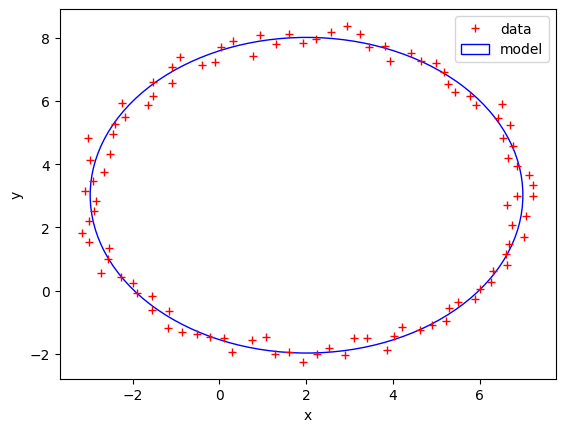

In [10]:
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt

# Create N points on circle with cx=2, cy=3 and r=5
N=100
theta = np.linspace(0., 2.0 * math.pi, N)
radius = 5. + 0.2 * np.random.randn(N)
x = 2 + radius * np.cos(theta)
y = 3 + radius * np.sin(theta)

# Randomly initialize params
cx = np.random.randn()
cy = np.random.randn()
r  = np.random.randn()

num_epoch=10000
learning_rate = 1e-7
for t in range(num_epoch):
    # Compute error
    # Ek = ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )^2
    deltas = np.square( x - cx ) + np.square( y - cy ) - np.square( r )
    loss = np.square(deltas).sum()
    if t % 1000 == 0:
        print(f't={t}: cx={cx}, cy={cy}, r={r}, loss={loss}')

    # Compute grads for each parameters using math (Symbolic Differentiation)
    # Note : autograd in PyTorch from aims at avoiding this (Automatic Differention)

    # dEk / dcx = - 4 * ( xk - cx ) * ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )
    # dEk / dcy = - 4 * ( yk - cy ) * ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )
    # dEk / dr  = - 4 * r  * ( ( xk - cx )^2 + ( yk - cy )^2 - r^2 )
    grad_cx = ( -4 * ( x - cx ) * deltas ).sum()
    grad_cy = ( -4 * ( y - cy ) * deltas ).sum()
    grad_r  = ( -4 * r * deltas ).sum()

    # Update weights
    cx -= learning_rate * grad_cx
    cy -= learning_rate * grad_cy
    r  -= learning_rate * grad_r

print(f'Result: cx={cx}, cy={cy}, r={r}, loss={loss}')
# Plot results
plt.plot(x, y, 'r+', label='data')
plt.xlabel('x')
plt.ylabel('y')
circle = plt.Circle((cx, cy), r, color='b', fill=False, label='model')
plt.gcf().gca().add_artist(circle)
plt.legend()
plt.show()

